<a href="https://colab.research.google.com/github/951237/TIL/blob/master/200922_TIL_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B3%B5%EC%8A%B5_%EB%B0%B0%EC%B6%94%EA%B0%80%EA%B2%A9_%EC%98%88%EC%83%81%ED%95%98%EA%B8%B0_%EC%A1%B0%EC%9E%91%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
# 0. 라이브러리 가져오기
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. 데이터 준비하기
파일경로 = "/content/drive/My Drive/data/ML/배추가격_데이터_예제_price data.csv"
배추가격예상 = pd.read_csv(파일경로)
독립 = 배추가격예상[['avgTemp', 'minTemp', 'maxTemp', 'rainFall']]
종속 = 배추가격예상[['avgPrice']]

# 1-1. 학습데이터, 훈련데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(독립, 종속, test_size= 0.2, random_state=1234)

In [127]:
# 2. 모델 구조만들기
X = tf.keras.layers.Input(shape=[4])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss="mse", metrics=['accuracy'])

In [120]:
# 2-1. 모델 구조만들기 - 히든레이어 추가
X = tf.keras.layers.Input(shape=[4])
H = tf.keras.layers.Dense(8, activation="swish")(X)
H = tf.keras.layers.Dense(8, activation="swish")(H)
H = tf.keras.layers.Dense(8, activation="swish")(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss="mse", metrics=['accuracy'])

In [129]:
# 2-2. 모델 구조만들기 - 히든레이어 + 배치노멀리제이션
X = tf.keras.layers.Input(shape=[4])

H = tf.keras.layers.Dense(8)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss="mse", metrics=['accuracy'])

In [130]:
model.summary()

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 40        
_________________________________________________________________
batch_normalization_12 (Batc (None, 8)                 32        
_________________________________________________________________
activation_12 (Activation)   (None, 8)                 0         
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 72        
_________________________________________________________________
batch_normalization_13 (Batc (None, 8)                 32        
_________________________________________________________________
activation_13 (Activation)   (None, 8)               

In [ ]:
# 3. 모델 학습(fit)시키기
result = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=150, batch_size=10, verbose = 1)


In [ ]:
print(result.history.keys())

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

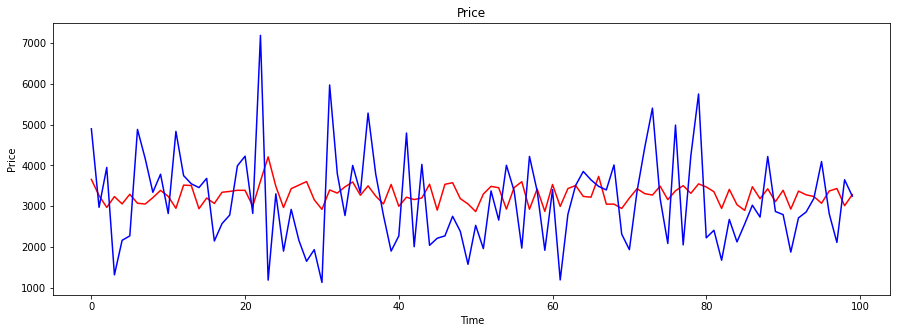

In [135]:
# 4. 모델 활용하기 : 가격 예측하기
pred = model.predict(X_test)

# 5. 예측가격과 실제가격 시각화하여 비교하기
# 5-1. 예측가격(넘파이) 데이터 프레임으로 바꾸기
my_list = map(lambda x: x[0], pred)
pre_price = pd.DataFrame(my_list, columns=["pred"])

# 5-2. 실제가격 데이터 정제하기
y_test = y_test.reset_index()['avgPrice'] #랜덤으로 섞인 인덱스 초기화하기

# 5-3. 그래프로 표현하기 
import matplotlib.pyplot as plt

# 그래프 겹처 그리기 : 검증셋 결과값 + 모델 예측값
plt.figure(figsize=(15,5))

plt.plot(pre_price[:100], color='red')
plt.plot(y_test[:100], color='blue')

plt.title("Price")
plt.xlabel("Time")
plt.ylabel("Price")

plt.show()